<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


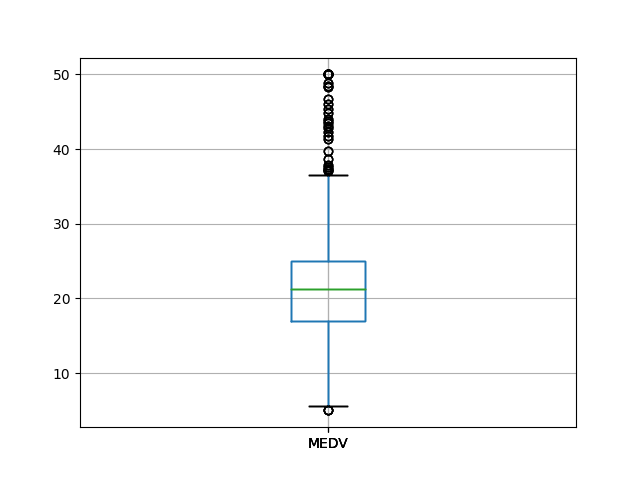

In [11]:
# Boxplot for the "Median value of owner-occupied homes"
ax =boston_df.boxplot(column = "MEDV")
plt.show()


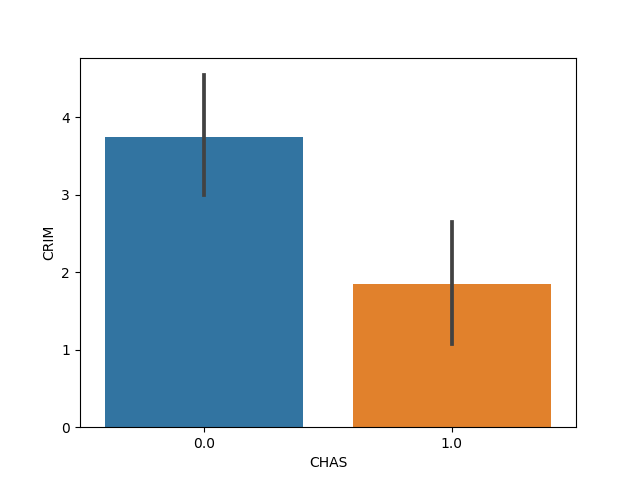

In [12]:
#Bar plot for the Charles river variable
ax = sns.barplot(x="CHAS", y="CRIM", data=boston_df)
plt.show()

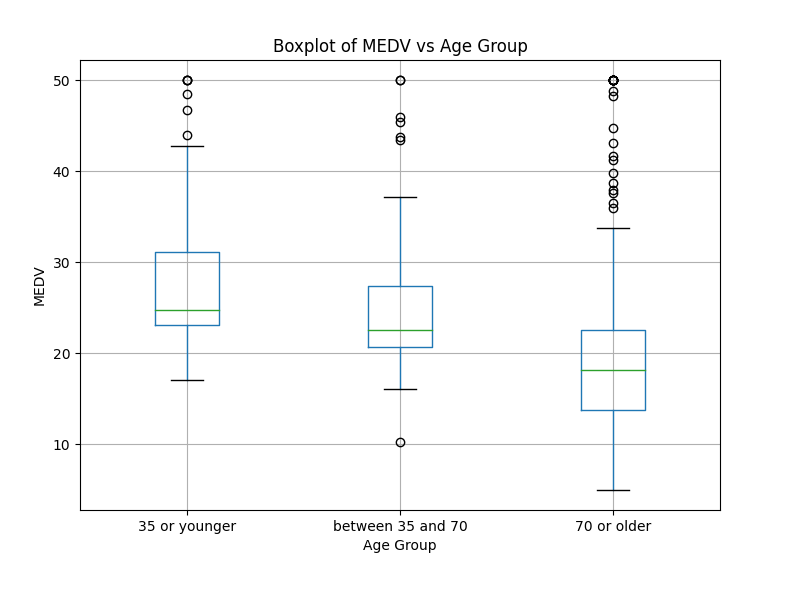

In [13]:
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 or younger', 'between 35 and 70', '70 or older'])

# create a boxplot of MEDV vs age_group
boston_df.boxplot(column='MEDV', by='age_group', figsize=(8,6))
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.title('Boxplot of MEDV vs Age Group')
plt.suptitle('')
plt.show()


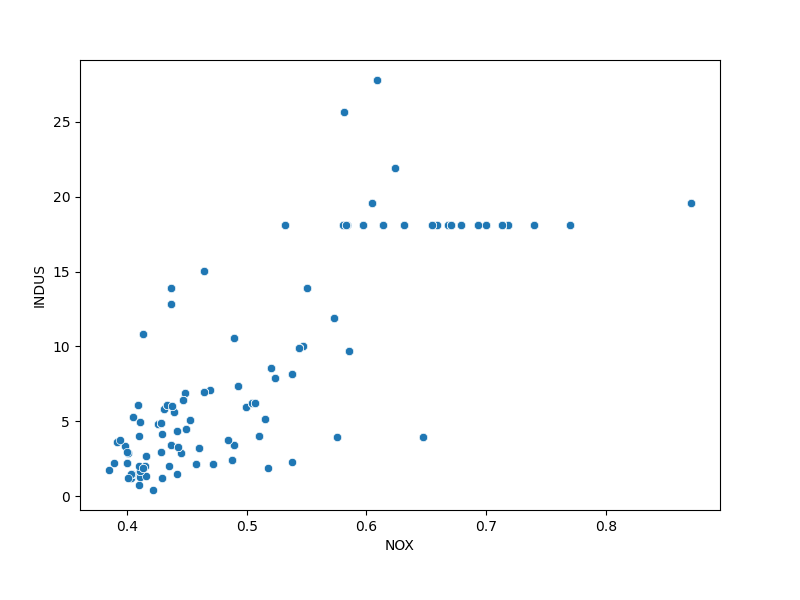

In [14]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()


In [15]:
print("They have a positive relationship")

They have a positive relationship


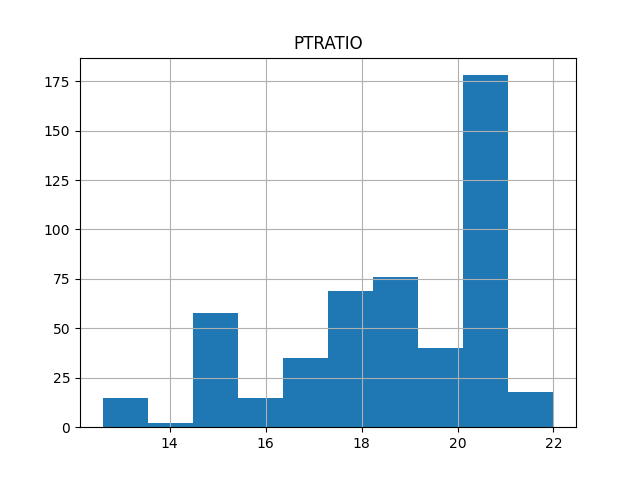

In [16]:
boston_df.hist(column='PTRATIO')
plt.show()

In [17]:
#t-test for independent samples
print("null hypothesis : the median values of houses bounded by the Charles river is the same.")

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)


null hypothesis : the median values of houses bounded by the Charles river is the same.


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**conclusion** :The conclusion is that because the p-value is less than alpha 0.025( two tailed), we reject the null hypothesis that there is a significant difference in median value of houses bounded by the Charles river

In [18]:
#ANOVA 
print("null hypothethis: Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) is the same")
groups = boston_df.groupby('AGE')['MEDV'].median()
group1 = groups[0:10].values
group2 = groups[10:20].values
group3 = groups[20:30].values
group4 = groups[30:40].values
group5 = groups[40:50].values
scipy.stats.f_oneway(group1, group2, group3, group4, group5)


null hypothethis: Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) is the same


F_onewayResult(statistic=1.702719647014955, pvalue=0.1536527476093084)

**conclusion** :The conclusion is that because the p-value is less than alpha 0.025( two tailed), we reject the null hypothesis that there is a significant difference in median value of houses bounded by the Charles river

In [19]:
#Pearson Correlation
print("null hypothesis: the there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

null hypothesis: the there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


(0.7636514469209189, 7.913361061211254e-98)

**conclusion** :The conclusion is that because the p-value is less than alpha 0.025( two tailed), we reject the null hypothesis that there is a significant difference in median value of houses bounded by the Charles river

In [20]:
#Regression analysis
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        16:34:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean evaluation scores based on gender. The coefficient 1.0916 means that MEDV get 1.0916 higher as the DIS increases one unit.
